<a href="https://colab.research.google.com/github/anaptoro/git_geotec2/blob/main/Aula1aAula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 1
Pré-requisitos Conta ativa no GEE, como criar: https://earthengine.google.com/new_signup/

### Carregando as bibliotecas necessárias no python

O curso será todo baseado na biblioteca geemap, que contém diversas ferramentas para utilização do gee no python.
Maiores informações:
https://geemap.org/ 

In [1]:
%%capture 
# O comando capture é utilizado para que os outputs da célula não sejam exibidos, se quiser exibir, é só comentar a linha
!pip install geemap # pip é o comando de instalação no python, quando vc coloca a ! na frente do comando, vc está executando como se fosse no prompt de comando

In [2]:
# import geemap #aqui vc está importando a biblioteca
import ee

In [3]:
import geemap

In [ ]:
Map = geemap.Map() #esse comando vai exigir uma autenticação


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=agfFQQDtBUK1zFBKA_-yaaVXTaf8Quu24qQnkv_G08A&tc=XohU-9PQRjw-hg2W-fpgqaXFqGT18m4jPdWkdNoZxHs&cc=lPygm01Y4DEymcszfZY9Yrf_1BgGrU4gjMwv7lUPq9Q

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1ARtbsJr2AJjWJTtHatS8R6D86ECNEhdMpT9jlbSmRtEx-9l0MbxOpTlv5FE

Successfully saved authorization token.


### Área de estudo 
*Abreviações comuns: AOI ou ROI*

Seleção de AE de estudo	

Exemplos de criação de um polígono para a AE de estudo

**Opção 1**
*   Desenhar a AE no mapa
*   Verificar as propriedades do polígono
*   Mudar o nome da variável para 'AE'

In [ ]:
Map
#explorar funcionalidades interativas e desenhar AOI

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
roi = ee.FeatureCollection(Map.draw_features)

In [ ]:
roi.getInfo()

In [ ]:
# Exportar o que vc desenhou ee.FeatureCollection as an Earth Engine asset.
# task = ee.batch.Export.table.toAsset(**{
#     'collection': roi,
#     'description':'exportToTableAssetExample',
#     'assetId': 'projects/ee-atoro/assets/aula1' #aqui eu suponho que dê pra colocar tds em uma collection
# })
# task.start()

In [ ]:
# task.status() #acompanhar o status

In [ ]:
roi = ee.FeatureCollection('projects/ee-gleyce/assets/AreaBarreiras')

In [ ]:
# Se quiser, pode centralizar na região de acordo com as coordenadas
Map.setCenter(-45.336456, -12.252786, 10) #pode centralizar assim ou pela ferramenta interativa no canto superior esquerdo

In [ ]:
# a = ee.Geometry(roi.geometry())

In [ ]:
# print('Polygon area: ', a.area().divide(1000 * 1000).getInfo()) # in square kilometers


### 2. Coleção de imagem

In [ ]:

AE = roi.geometry()

In [ ]:
L5 = ee.ImageCollection('LANDSAT/LT05/C01/T1_SR').filterBounds(AE).filterDate('2010-11-15', '2011-03-01')
img_estudo = ee.Image(L5.median()).clip(AE)
visParams = ({'bands':['B3',  'B2',  'B1'], 'min': 150, 'max': 2000})


In [ ]:
# //Adicionar as cenas de acordo com a AE de estudo 
Map.addLayer(L5.first(), visParams, 'Imagem Landsat 5')

Map.addLayer(img_estudo, visParams, 'Imagem Landsat 5 - AE de estudo')

In [ ]:
Map

Map(bottom=70361.0, center=[-12.330610722465378, -45.04943847656251], controls=(WidgetControl(options=['positi…

In [ ]:

# Visualizar a lista de imagens
ListadeImagens_L5 = L5.toList(L5.size())
print('ListadeImagens_L5:', ListadeImagens_L5.getInfo())

ListadeImagens_L5: [{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7901, 6941], 'crs': 'EPSG:32623', 'crs_transform': [30, 0, 334185, 0, -30, -1175685]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7901, 6941], 'crs': 'EPSG:32623', 'crs_transform': [30, 0, 334185, 0, -30, -1175685]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7901, 6941], 'crs': 'EPSG:32623', 'crs_transform': [30, 0, 334185, 0, -30, -1175685]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7901, 6941], 'crs': 'EPSG:32623', 'crs_transform': [30, 0, 334185, 0, -30, -1175685]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7901, 6941], 'crs': 'EPSG:32623', 'crs_

In [ ]:
#Para LANDSAT 8 - disponibilidade de Abril 2013 até o momento

In [ ]:
 #coleção do Landsat 8
 L8 = ee.ImageCollection ('LANDSAT/LC08/C01/T1_SR').filterBounds(AE).filterDate('2016-11-15', '2017-03-01')

In [ ]:
#Adicionar as cenas de acordo com a AE de estudo 
Map = geemap.Map()

img_estudo = ee.Image(L8.median()).clip(AE)
visParams = ({'bands':['B4',  'B3',  'B2'], 'min': 150, 'max': 2000})
Map.addLayer(L8.first(), visParams, 'Imagem Landsat 8')

Map.addLayer(img_estudo, visParams, 'Imagem Landsat 8 - AE de estudo')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
# Map

In [ ]:
#Recorte ae de estudo

In [ ]:
# // Criando função clip para recortar a AE de estudo
# //Para L5 substituir L8 por L8 
Map = geemap.Map()

def clipper(image):
  return image.clip(AE)

L5 = L5.map(clipper)
visParams = ({'bands':['B3',  'B2',  'B1'], 'min': 150, 'max': 2000})
Map.addLayer(L5.first(), visParams, 'Imagem Landsat 5')
Map.setCenter(-45.336456, -12.252786, 10)
Map

Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

In [ ]:
# // Criando função clip para recortar a AE de estudo
# //Para L8 
Map = geemap.Map()

def clipper(image):
  return image.clip(AE)

L8 = L8.map(clipper)
visParams = ({'bands':['B4',  'B3',  'B2'], 'min': 150, 'max': 2000})
Map.addLayer(L8.first(), visParams, 'Imagem Landsat 8')
Map.setCenter(-45.336456, -12.252786, 10)
Map

Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

### Prática no GEE - 02/09 - Remoção de nuvens 
Tabela de qualidade de pixel para remoção de nuvem LANDSAT 5
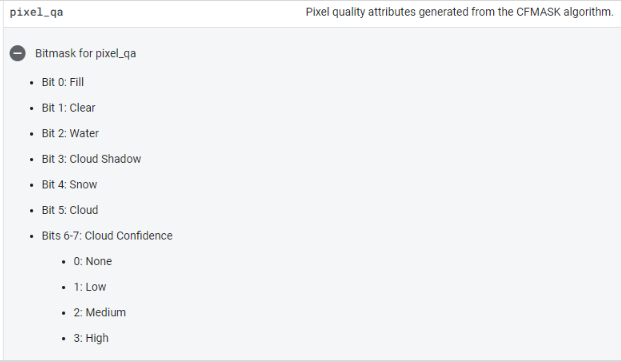

Tabela de qualidade de pixel para remoção de nuvem LANDSAT 8
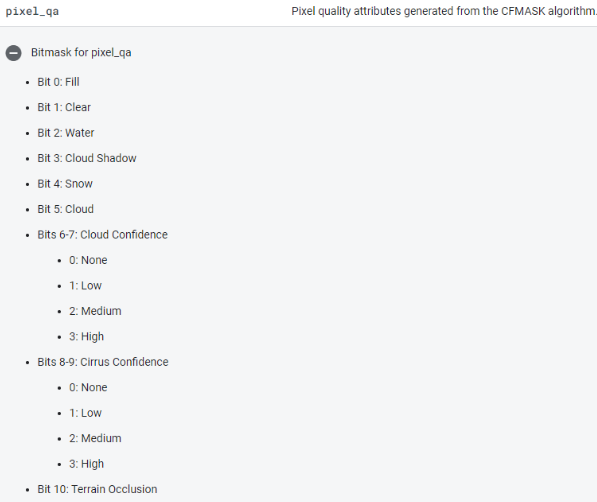



PARA **LANDSAT 5**

In [ ]:
# Função para máscara de nuvem para o LANDSAT 5 - SR
Map = geemap.Map()
  # //Se o bit da nuvem (5) estiver definido e a confiança da nuvem (7) for alta 
  # //ou o bit da sombra da nuvem estiver definido (3), então é um pixel ruim.
def maskL5(image):
  qa = image.select('pixel_qa')

  cloud = qa.bitwiseAnd(1 << 5) \
          .And(qa.bitwiseAnd(1 << 7)) \
          .Or(qa.bitwiseAnd(1 << 3))
  # // Remove pixels de borda que não ocorrem em todas as bandas
  mask2 = image.mask().reduce(ee.Reducer.min())
  return image.updateMask(cloud.Not()).updateMask(mask2)
# // Aplicar a função criada  
L5masked = L5.map(maskL5)
# //Parâmetros de Visualização colorida (cor verdadeira/Red-Green-Blue) Landsat 5
visParams2 = {'bands':['B3',  'B2',  'B1'], 'min': 150, 'max': 2000}
# //Visualizar uma imagem em composição colorida com e sem máscara de nuvem 

Map.addLayer(ee.Image(L5masked.first()), visParams2, 'Landsat 5 - Máscara de nuvem')
Map.addLayer(ee.Image(L5.first()), visParams2, 'Landsat 5 - Original')  
Map.setCenter(-45.336456, -12.252786, 10)
Map

Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

PARA LANDSAT 8

In [ ]:
# Função para máscara de nuvem para o Landsat 8 - SR
Map = geemap.Map()

def maskL8(image):
  # // Bits 3 e 5 são nuvens e sombra de nuvem, respectivamente.
  cloudShadowBitMask = 1 << 3
  cloudsBitMask = 1 << 5
  # // Selecionar a banda pixel QA
  qa = image.select('pixel_qa')
# // Ambos os valores devem ser zero, indicando condições sem nuvens

  mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0) \
      .And(qa.bitwiseAnd(cloudsBitMask).eq(0))
  # // Retorna a imagem com a máscara
  return image.updateMask(mask).copyProperties(image, ["system:time_start"]) \
      #  // .select("B[0-9]*")
      
# // Aplicar a função criada
L8masked = L8.map(maskL8)
# //Parametros de visualização Landsat 8
visParams = ({'bands': ['B4', 'B3', 'B2'], 'min': 150, 'max': 2000})
# //Visualizar uma imagem Landsat 8 em composição colorida com e sem máscara de nuvem
Map.addLayer(ee.Image(L8masked.first()), visParams, 'Landsat 8 - Máscara de nuvem')
Map.addLayer(ee.Image(L8.first()), visParams, 'Landsat 8 - Original')
Map.setCenter(-45.336456, -12.252786, 10)

Map


Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

### Prática no GEE - 02/09 - Cálculo de índice de vegetação 

In [ ]:
#  Landsat 5 - SR
Map = geemap.Map()

def NDVI(img):
  return img.addBands(img.normalizedDifference(['B4','B3']).rename('NDVI'))

# //Adicionar o NDVI para todo o conjunto de dados 
L5ndvi = L5masked.map(NDVI)

# //Para cada pixel seleciona o "melhor" dentro do conjunto de dados da área de estudo baseado no NDVI
composite = L5ndvi.qualityMosaic('NDVI').clip(AE)
#print(composite, 'composite')
# // Parametros de visualização NDVI
ndviPalette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718','74A901', '66A000', '529400', '3E8601', '207401', '056201',
'004C00', '023B01', '012E01', '011D01', '011301']

# //Visualizar a imagem de NDVI da área de estudo

Map.addLayer(composite.select('NDVI'), {'min': 0, 'max':1, 'palette': ndviPalette}, 'Landsat 5 - NDVI')

#Composição colorida
Map.addLayer(composite, {'bands': ['B3',  'B2',  'B1'], 'min':150, 'max':2000}, 'Landsat 5 - cor verdadeira')

#Composição falsa cor
Map.addLayer(composite, {'bands': ['B4',  'B5',  'B3'], 'min': 0, 'max': 2000}, 'Landsat 5 - falsa cor')

Map.setCenter(-45.336456, -12.252786, 10)
Map


Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

In [ ]:
#  Landsat 8 - SR
Map = geemap.Map()

def NDVI(img):
  return img.addBands(img.normalizedDifference(['B5','B4']).rename('NDVI'))

#Adicionar o NDVI para todo o conjunto de dados
L8ndvi = L8masked.map(NDVI)

#Para cada pixel seleciona o "melhor" dentro do conjunto de dados da área de estudo baseado no NDVI
composite = L8ndvi.qualityMosaic('NDVI').clip(AE)
# print(composite, 'composite')

#Acessar o ee-palette para gerar paleta de cores automáticas no GEE
# palettes = require('users/gena/packages:palettes'); #https:#github.com/gee-community/ee-palettes
# #Adicionar a paleta de cores escolhida na declaração da variável
# paleta = palettes.niccoli.isol[7]

#Visualizar a imagem de NDVI da área de estudo
Map.addLayer(composite.select('NDVI'), {'min': 0, 'max':1}, 'Landsat 8 - NDVI') #debug

#Composição colorida
Map.addLayer(composite, {'bands': ['B4',  'B3',  'B2'], 'min':0, 'max':2000}, 'Landsat 8 - cor verdadeira')

#Composição falsa cor
Map.addLayer(composite, {'bands': ['B5',  'B6',  'B4'], 'min': [1500,  1000,  100], 'max': [5500, 4500, 1500]}, 'Landsat 8 - falsa cor')

Map.setCenter(-45.336456, -12.252786, 10)
Map


Map(center=[-12.252786, -45.336456], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

### Aula 21/09/2022 - Coleta de amostras


In [6]:
Map = geemap.Map()
import geemap.colormaps as cm
collection = ee.ImageCollection('MODIS/006/MOD13A2') \
    .filterDate('2020-08-01', '2021-08-31') \
    .select('NDVI')

# Convert the image collection to an image.
image = collection.toBands()

palette = cm.palettes.ndvi

ndvi_vis = {
  'min': 0.0,
  'max': 9000.0,
  'palette': palette
}

Map.addLayer(image, {}, 'MODIS NDVI Time-series')
Map.addLayer(image.select(0), ndvi_vis, 'MODIS NDVI VIS')

Map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
Map

In [ ]:
if Map.user_rois is not None:
    training_samples = Map.user_rois  ###testar com ponto ver se funciona, funciona
    print(training_samples.getInfo())

In [ ]:
geemap.show_youtube("https://youtu.be/VWh5PxXPZw0")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#pra ir pra pastinha do colab
geemap.ee_to_shp(Map.user_rois, "samples_campina3.shp")


In [ ]:
#exportar como asset
geemap.ee_export_vector_to_asset(Map.user_rois, description='myExportTableTask', assetId='samples_campina3', maxVertices=None)